<a href="https://colab.research.google.com/github/Pilla-Divya-Vidhyasree/Netflix_analysis/blob/main/Netflix_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk


In [ ]:
data=pd.read_csv("/content/netflix_titles.csv")
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


<Axes: ylabel='type'>

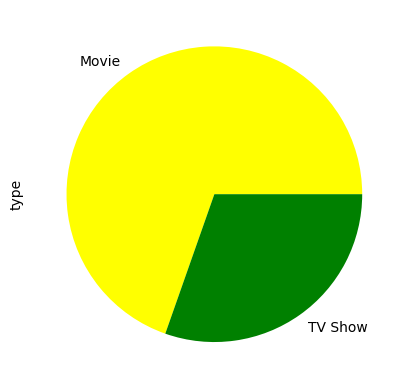

In [ ]:
data['type'].value_counts().plot(kind='pie',colors=['yellow','green'])

In [ ]:
#count of how many movies released in years gets stored in movie_year
#count of how many Tv Shows released in years gets stored in tv_year

movies=data[data['type']=='Movie']
tv_shows = data[data['type']=='TV Show']
tv_year=tv_shows.groupby('release_year').agg({'type':'count'})
movie_year=movies.groupby('release_year').agg({'type':'count'})
#print(movie_year)
#print(tv_year)

In [ ]:
#merging two dataframes
merged_df = pd.merge(tv_year, movie_year, on='release_year', suffixes=('Movies', 'TV Shows'), how='outer')

#setting release_year as col

merged_df.reset_index(inplace=True)
merged_df.rename(columns={'index':'release_year'}, inplace='True')
#filling missing values

mergerd_df=merged_df.fillna(0, inplace=True)
merged_df

,release_year,typeMovies,typeTV Shows
0,1925,1.0,0.0
1,1945,1.0,3.0
2,1946,1.0,1.0
3,1963,1.0,1.0
4,1967,1.0,4.0
...,...,...,...
69,1980,0.0,11.0
70,1982,0.0,17.0
71,1983,0.0,11.0
72,1984,0.0,12.0


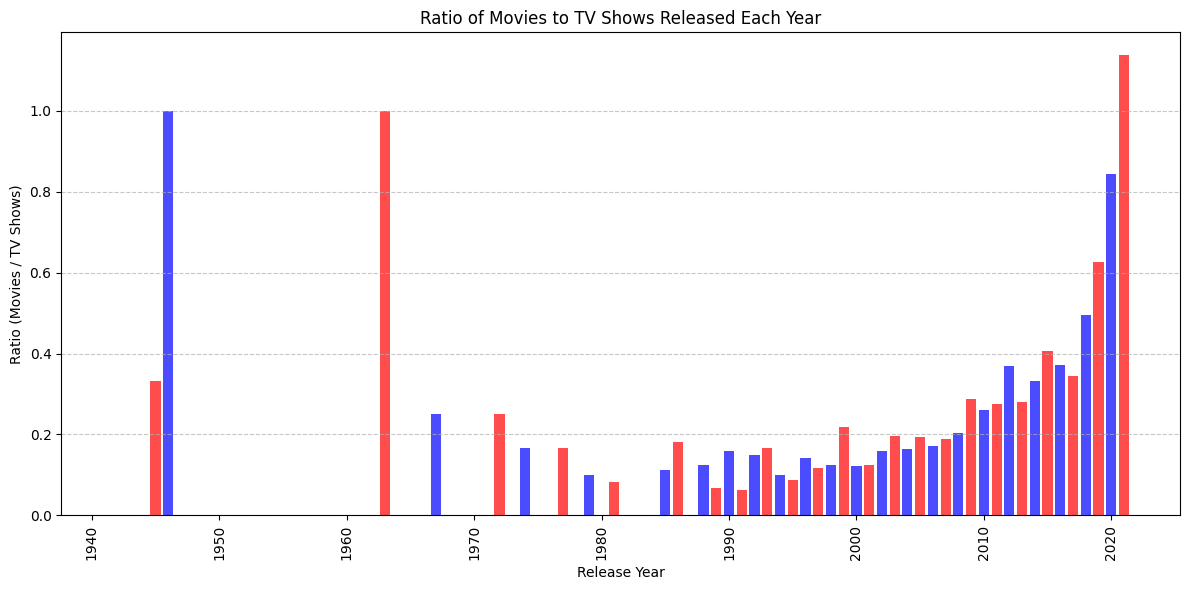

In [ ]:
#calculating ratio btw movies and shows in years

merged_df['ratio']=merged_df['typeMovies']/merged_df['typeTV Shows']
merged_df

#creating bar graph

plt.figure(figsize=(12, 6))
plt.bar(merged_df['release_year'], merged_df['ratio'], color=['blue','red'], alpha=0.7)
plt.xlabel('Release Year')
plt.ylabel('Ratio (Movies / TV Shows)')
plt.title('Ratio of Movies to TV Shows Released Each Year')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

<Axes: >

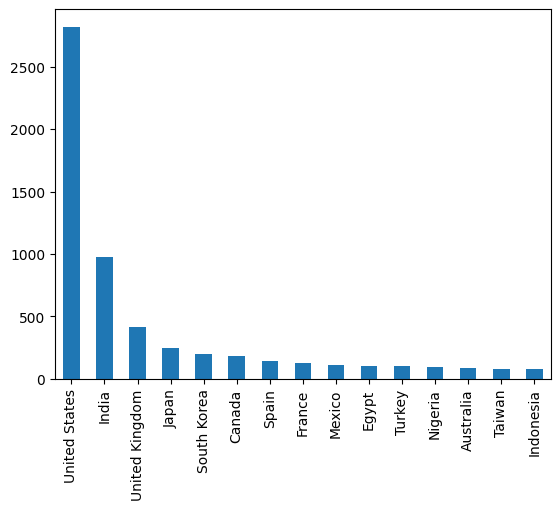

In [ ]:
data.country.value_counts()[:15].plot(kind="bar")

<Axes: ylabel='rating'>

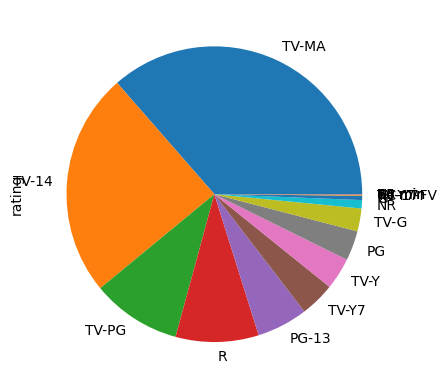

In [ ]:
data.rating.value_counts().plot(kind='pie')

In [56]:
## Highest numbers of movies directed directors
data['director'].value_counts().sort_values(ascending=False)[:30]

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Jay Chapman               12
Martin Scorsese           12
Steven Spielberg          11
Don Michael Paul          10
David Dhawan               9
Troy Miller                8
Hakan Algül                8
Robert Rodriguez           8
Fernando Ayllón            8
Shannon Hartman            8
Johnnie To                 8
Ryan Polito                8
Kunle Afolayan             8
Lance Bangs                8
Yılmaz Erdoğan             8
Quentin Tarantino          8
Mae Czarina Cruz           7
Ron Howard                 7
Toshiya Shinohara          7
McG                        7
Ram Gopal Varma            7
Prakash Satam              7
Hidenori Inoue             7
Name: director, dtype: int64

<Axes: >

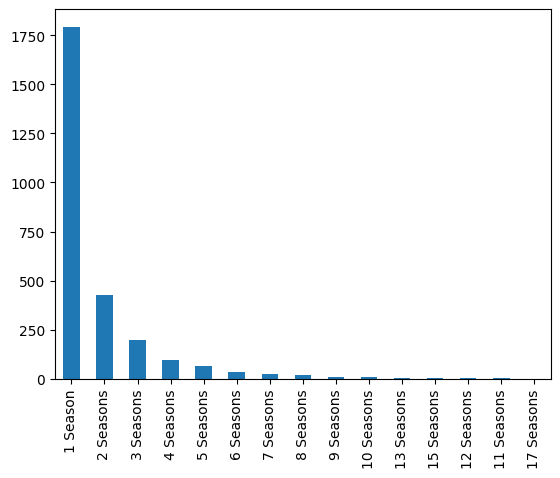

In [60]:
#Plotting Number of seasons the TV Shows are

data[data['type']=='TV Show']['duration'].value_counts().plot(kind='bar')

In [61]:
data['listed_in'].value_counts()[:20]

Dramas, International Movies                         362
Documentaries                                        359
Stand-Up Comedy                                      334
Comedies, Dramas, International Movies               274
Dramas, Independent Movies, International Movies     252
Kids' TV                                             220
Children & Family Movies                             215
Children & Family Movies, Comedies                   201
Documentaries, International Movies                  186
Dramas, International Movies, Romantic Movies        180
Comedies, International Movies                       176
Comedies, International Movies, Romantic Movies      152
Dramas                                               138
Dramas, International Movies, Thrillers              134
Action & Adventure, Dramas, International Movies     132
Action & Adventure                                   128
International TV Shows, TV Dramas                    121
Comedies, Dramas, Independent M

In [66]:
#printing differet generes count in an ascending order

stacked = data['listed_in'].str.split(', ').explode()
genere_count = stacked.value_counts().sort_index()
genere_count.columns=['genere_type','count']
genere_count

Action & Adventure               859
Anime Features                    71
Anime Series                     176
British TV Shows                 253
Children & Family Movies         641
Classic & Cult TV                 28
Classic Movies                   116
Comedies                        1674
Crime TV Shows                   470
Cult Movies                       71
Documentaries                    869
Docuseries                       395
Dramas                          2427
Faith & Spirituality              65
Horror Movies                    357
Independent Movies               756
International Movies            2752
International TV Shows          1351
Kids' TV                         451
Korean TV Shows                  151
LGBTQ Movies                     102
Movies                            57
Music & Musicals                 375
Reality TV                       255
Romantic Movies                  616
Romantic TV Shows                370
Sci-Fi & Fantasy                 243
S

<Axes: >

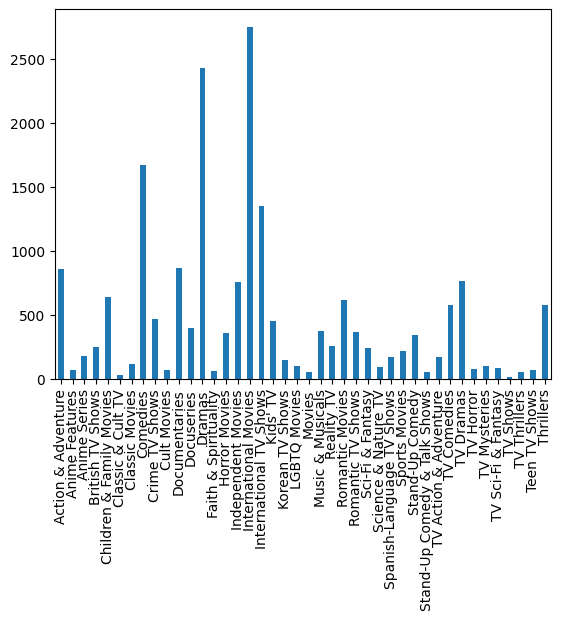

In [67]:
genere_count.plot(kind='bar', x='genere_type', y='count')